# Classification with TensorFlow

### Ahmed J. Zerouali (2021/08/22-25)

This notebook explores a classification example with TensorFlow 2.0. It is based on Lectures 141-142 in Section 25 of Pierian Data's DSML Bootcamp. 

The new things in this part deal with avoiding overfitting, such as early stopping conditions and adding dropout layers.

The data used here is on cancer tumors, and we wish to decide whether a tumor is benign or malignant.

## Contents

1) Data - Exploratory Analysis and Pre-processing

2) Classification with TensorFlow


____________

## 1) Data - Exploratory Analysis and Pre-processing

This section is based on Lecture 141.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I'm still not sure about what this does exactly...
%matplotlib inline

### a) Exploratory Data Analysis

* Load "cancer_classification.csv". There's no missing data, not many samples, 30 features. Using *sns.pairplot()* takes a lot of time on this data set. The label we're interested in is **benign_0__mal_1**.

In [3]:
df_cancer = pd.read_csv("cancer_classification.csv")

In [4]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:>

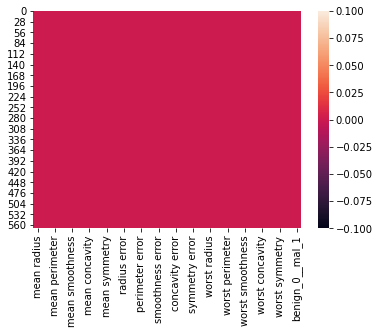

In [5]:
sns.heatmap(df_cancer.isnull())

In [6]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df_cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


* **Important:** Given a binary classification problem, it's important to know whether the training/validation data set represents both categories well. Portilla calls this *balanced*, and previously gave the example of having to predict whether an image a cat or a dog, but where the data set contains 99 pictures of cats and just 1 picture of a dog.

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

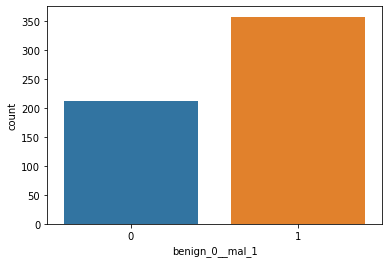

In [8]:
sns.countplot(x = "benign_0__mal_1", data = df_cancer)

* We can look at how our label is correlated to the other features:

In [9]:
df_cancer.corr()["benign_0__mal_1"].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

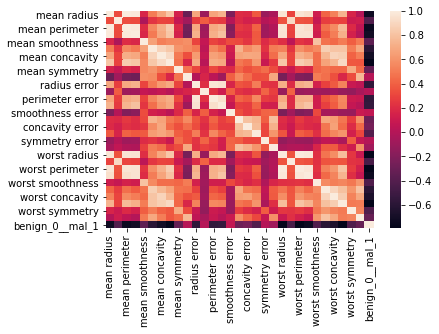

In [10]:
sns.heatmap(df_cancer.corr())

* Another trick to better visualize correlations with respect to one feature: *Use a barplot for correlations*. Portilla directly uses the **pdf.plot(kind = "bar")** method on the dataframe:

<AxesSubplot:>

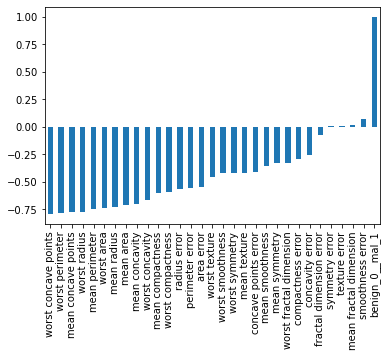

In [11]:
df_cancer.corr()["benign_0__mal_1"].sort_values().plot(kind = "bar")

### b) Pre-processing

* Next, we split our data set into training and validation subsets. As usual, we start by converting the data set and the label into X and y Numpy arrays.

In [12]:
X = df_cancer.drop(labels = "benign_0__mal_1", axis = 1).values
y = df_cancer["benign_0__mal_1"].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
[ X_train, X_test, y_train, y_test] = train_test_split(X,y, test_size =0.25, random_state=101)

* We now scale the data. Create the instance:

In [15]:
from sklearn.preprocessing import MinMaxScaler

cancer_scaler = MinMaxScaler()

* Fit the scaler to the training data, then use resulting object to scale the data set:

In [16]:
X_train = cancer_scaler.fit_transform(X_train)

X_test = cancer_scaler.transform(X_test)

___________________________


## 2) Classification with TensorFlow

This is Lecture 142. 

### a) Building the neural net


* Let's import sequential for the nets, as well as **Dense** and **Dropout** layers.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

* Construct a network with the following layers:
    * One input layer with 30 nodes and ReLU activation;
    * One hidden layer with 15 nodes and ReLU activation;
    * Output layer with one 1 neuron and sigmoid activation (since we're doing binary classification);
    * The model is compiled with the ADAM optimization algorithm and binary cross-entropy loss.

In [47]:
# Instantiate net
nn_model = Sequential()

# Input layer :
nn_model.add(Dense(units = 30, activation = "relu"))

# Hidden layer
nn_model.add(Dense(units = 15, activation = "relu"))

# Output layer with sigmoid activation
nn_model.add(Dense(units = 1, activation = "sigmoid"))

# Compile model:
nn_model.compile(optimizer = "adam", loss = "binary_crossentropy")

### b) Overfitting

* Next, we train the model and provide it with the test set. We choose a large number of epochs to see the effect of overfitting.

In [48]:
nn_model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), verbose =1, epochs =600)

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6760 - val_loss: 0.6617
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6495 - val_loss: 0.6362
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6192 - val_loss: 0.5990
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5820 - val_loss: 0.5591
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5426 - val_loss: 0.5194
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5028 - val_loss: 0.4783
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4614 - val_loss: 0.4352
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4189 - val_loss: 0.3914
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3777 - val_loss: 0.3532
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3421 - val_loss: 0.3169
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0519 - val_loss: 0.1167
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0513 - val_loss: 0.1172
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0518 - val_loss: 0.1142
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.1157
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.1197
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0540 - val_loss: 0.1114
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0602 - val_loss: 0.1204
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0534 - val_loss: 0.1141
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.1252
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.1186
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.1288
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0434 - val_loss: 0.1394
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.1392
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0361 - val_loss: 0.1311
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.1356
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.1306
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.1433
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.1254
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.1350
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.1376
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.1584
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.1459
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.1474
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.1470
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.1559
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.1551
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.1498
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.1621
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.1525
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.1568
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.1707
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.1669
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.1783
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.1773
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.1671
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.1639
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.1690
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.1747
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.1903
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.1571
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.2088
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.2013
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.1915
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.2071
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.1874
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.1936
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.2028
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.2039
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.2184
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.2091
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.2337
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.2333
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.2246
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.2487
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.2422
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.2286
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.2650
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.2504
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.2406
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.2737
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.2683
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.2729
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.2821
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.2840
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.2810
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.2702
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.3041
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.2767
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.2902
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.2671
Epoc

* Now we look at the loss history. Again, the history is a dictionary *nn_model.history.history*, and we use Pandas to plot the two curves (training loss and *val_loss* on the test data).

In [49]:
model_losses_history = pd.DataFrame(nn_model.history.history)

<Figure size 864x720 with 0 Axes>

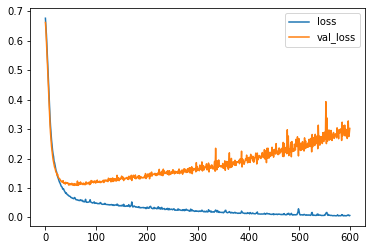

<Figure size 864x720 with 0 Axes>

In [50]:

model_losses_history.plot()
plt.figure(figsize=(12,10))

* The growing loss on the test data shows that we have **overfitting** in this case.

### c) Early stopping

* We start afresh with the same network architecture as the previous subsection:

In [35]:
# Instantiate net
nn_model_1 = Sequential()

# Input layer :
nn_model_1.add(Dense(units = 30, activation = "relu"))

# Hidden layer
nn_model_1.add(Dense(units = 15, activation = "relu"))

# Output layer with sigmoid activation
nn_model_1.add(Dense(units = 1, activation = "sigmoid"))

# Compile model:
nn_model_1.compile(optimizer = "adam", loss = "binary_crossentropy")

* From Keras' **callbacks** library, we import the **EarlyStopping** class. From the help:
    * The signature of the constructor is: **EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)**.
   
    * Purpose: *Stop training when a monitored metric has stopped improving.*
    * The arguments that we'll be using are **monitor="val_loss"**, **mode = "min"** (because we want to minimize the validation loss), and **patience = 25**, which is the number of epochs with no improvementafter which training will be stopped.

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 25, verbose = 1)

* We train the new model, but this time **we pass *callbacks = [early_stop]* as an argument for Sequential.fit()**:

In [42]:
nn_model_1.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), verbose =1, epochs =600, \
            callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6792 - val_loss: 0.6562
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6420 - val_loss: 0.6162
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5938 - val_loss: 0.5611
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5370 - val_loss: 0.5007
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4790 - val_loss: 0.4406
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4229 - val_loss: 0.3891
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3774 - val_loss: 0.3418
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3354 - val_loss: 0.3060
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3026 - val_loss: 0.2706
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2736 - val_loss: 0.2498
Epoch 11

* In the loss history plot below, we see that the training has been stopped at 75 epochs.

In [43]:
model_1_losses_history = pd.DataFrame(nn_model_1.history.history)

<AxesSubplot:>

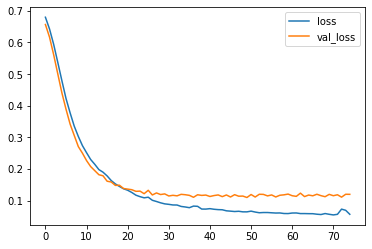

In [45]:
model_1_losses_history.plot()

* In brief, using early stopping, we can take large numbers of eopchs, but we can impose early stopping to avoid overfitting.

### d) Adding dropout layers

* Another approach to avoid overfitting is adding dropout layers, which will *deactivate a random number of neurons*. From the help:

       The Dropout layer randomly sets input units to 0 with a frequency of `rate`
       at each step during training time, which helps prevent overfitting.
       Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
       all inputs is unchanged.

* Here we construct a new model, but after each dense layer, we add a dropout layer. The main parameter we are concerned with is the **rate** in Dropout(), the percentage of neurons that are set to 0 during training (typically, between 0.2 and 0.5).

In [52]:
# Instantiate net
nn_model_2 = Sequential()

# Input layer :
nn_model_2.add(Dense(units = 30, activation = "relu"))
nn_model_2.add(Dropout(rate=0.5))

# Hidden layer
nn_model_2.add(Dense(units = 15, activation = "relu"))
nn_model_2.add(Dropout(rate=0.5))

# Output layer with sigmoid activation
nn_model_2.add(Dense(units = 1, activation = "sigmoid"))

# Compile model:
nn_model_2.compile(optimizer = "adam", loss = "binary_crossentropy")

* To train *nn_model_2*, we'll also use the EarlyStopping() object created earlier.

In [53]:
nn_model_2.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), verbose =1, epochs =600, \
            callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 30ms/step - loss: 0.7182 - val_loss: 0.6812
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6962 - val_loss: 0.6635
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6630 - val_loss: 0.6487
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6557 - val_loss: 0.6348
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6302 - val_loss: 0.6195
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6237 - val_loss: 0.6025
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5909 - val_loss: 0.5770
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5682 - val_loss: 0.5442
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5685 - val_loss: 0.5093
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5453 - val_loss: 0.4738
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1121 - val_loss: 0.0964
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1282 - val_loss: 0.0943
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1223 - val_loss: 0.1007
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0974 - val_loss: 0.1032
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1202 - val_loss: 0.0938
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1011 - val_loss: 0.1018
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1183 - val_loss: 0.1184
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1085 - val_loss: 0.0980
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0994 - val_loss: 0.0932
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1110 - val_loss: 0.0945
Epoch 93/600


* This time the training went up to 125 epochs, which is good. If we plot the loss history we obtain:

In [54]:
model_2_losses_history = pd.DataFrame(nn_model_2.history.history)

<AxesSubplot:>

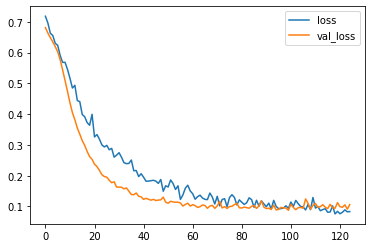

In [55]:
model_2_losses_history.plot()

* From this plot we see that both the training and validation losses are dropping quickly, but still remain close, which showcases better performance compared to the previous cases.

### e) Evaluation

* We now evaluate the performance of our classification. First we import the metrics from Scikit:

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

* Next we make predictions using our trained models. Since it's a classification, TensorFlow used the method **Sequential.predict_classes()** before, if we try it:

In [58]:
y_pred_0 = nn_model.predict_classes(X_test)
y_pred_1 = nn_model_1.predict_classes(X_test)
y_pred_2 = nn_model_2.predict_classes(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


we get the following out-of-date warning:


            UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. 
            Please use instead:
            * `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification (e.g. if it uses a
            'softmax` last-layer activation).
            * `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a
            `sigmoid` last-layer activation).
             warnings.warn('`model.predict_classes()` is deprecated and '
             
* Here's the right way to do it:

In [76]:
z_pred_0 = (nn_model.predict(X_test) > 0.5).astype("int32")
z_pred_1 = (nn_model_1.predict(X_test) > 0.5).astype("int32")

In [72]:
z_pred_2 = (nn_model_2.predict(X_test) > 0.5).astype("int32")

* Let's evaluate the 3 models now:

In [75]:
print(classification_report(y_test, z_pred_2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [80]:
print(confusion_matrix(y_test, z_pred_2))

[[54  1]
 [ 5 83]]


In [77]:
print(classification_report(y_test, z_pred_0))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.99      0.92      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [81]:
print(confusion_matrix(y_test, z_pred_0))

[[54  1]
 [ 7 81]]


In [78]:
print(classification_report(y_test, z_pred_1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [82]:
print(confusion_matrix(y_test, z_pred_1))

[[54  1]
 [ 4 84]]


Again, the results are not as good Portilla's.